In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
bigdmart = pd.read_csv("bigdatamart_train.csv")

In [3]:
big = pd.read_csv("bigdatamart_train.csv")

In [4]:
bigdmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
bigdmart.shape

(8523, 12)

In [6]:
bigdmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
bigdmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']
for value in columns:
    print(bigdmart[value].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12.    10.1    7.785 13.15
  8.5    7.63   9.285  7.975 15.7    8.98

In [9]:
bigdmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### working with categorical and mixed columns
 - itemidentifier divide numbers and aphabets
 - Item fat content - label encoding
 - item-type - label encoding
 - establishment year -dtype - one hot encoding
 - Outlet_Location_Type  - label encoding
 - outlet_type  - one hot encoder


In [10]:
bigdmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
bigdmart_cat = bigdmart[['Item_Identifier',  'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',"Outlet_Size", 'Outlet_Location_Type',
       'Outlet_Type']].copy()
bigdmart_cat.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [12]:
bigdmart_cat.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [13]:
bigdmart_cat.shape

(8523, 7)

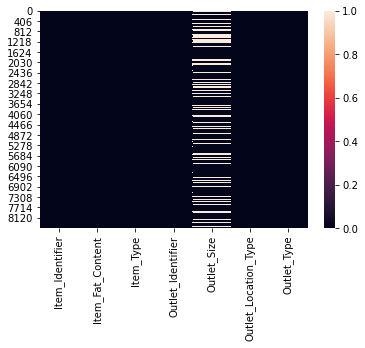

In [14]:
sns.heatmap(bigdmart_cat.isnull())

In [15]:
bigdmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [17]:
#sets the dataframe to display truncated view
#pd.set_option('display.max_rows', None)

In [18]:
bigdmart_cat["Item_Identifier"].unique

<bound method Series.unique of 0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object>

In [19]:
bigdmart_cat["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [20]:
sns.set(rc={'figure.figsize':(25,15)})

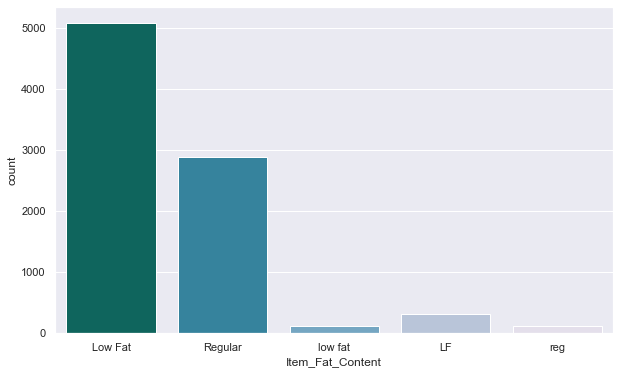

In [21]:
fig_size = (10,6)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=bigdmart_cat, x="Item_Fat_Content", palette = "PuBuGn_r")

In [22]:
 bigdmart_cat["Item_Fat_Content"] =  bigdmart_cat["Item_Fat_Content"].replace("low fat", "Low Fat")

In [23]:
 bigdmart_cat["Item_Fat_Content"] =  bigdmart_cat["Item_Fat_Content"].replace("LF", "Low Fat")

In [24]:
 bigdmart_cat["Item_Fat_Content"] =  bigdmart_cat["Item_Fat_Content"].replace("reg", 'Regular')

In [25]:
 bigdmart_cat["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

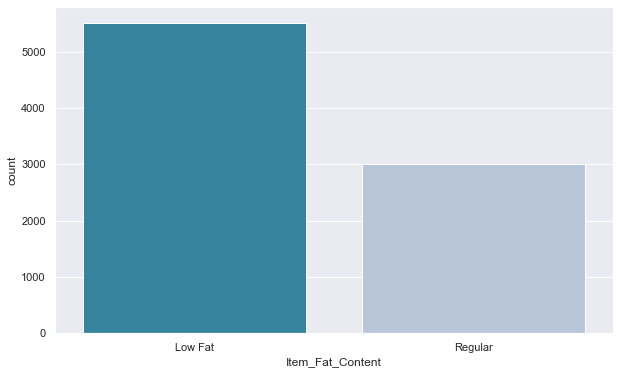

In [26]:
fig_size = (10,6)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=bigdmart_cat, x="Item_Fat_Content", palette = "PuBuGn_r")

In [27]:
print(bigdmart_cat["Item_Fat_Content"].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [28]:
 bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [29]:
bigdmart_cat["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

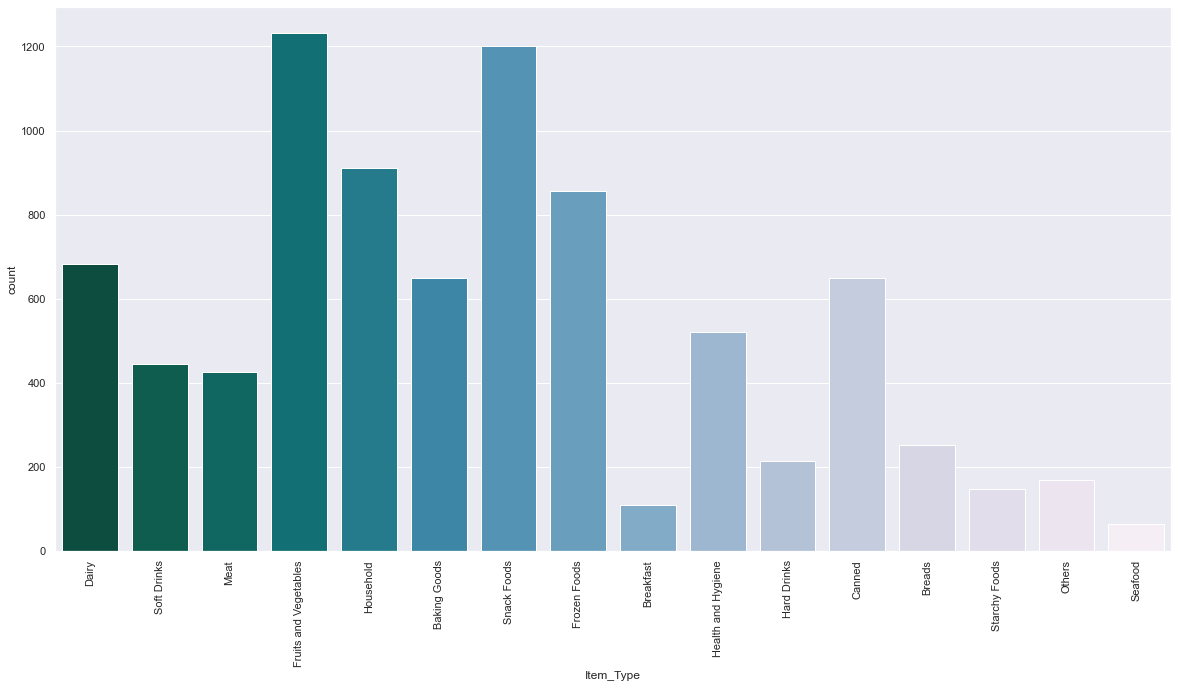

In [30]:
fig_size = (20,10)
fig, ax = plt.subplots(figsize = fig_size)
plt.xticks(rotation=90)
sns.countplot(data=bigdmart_cat, x="Item_Type", palette = "PuBuGn_r")

In [31]:
print(bigdmart_cat["Item_Type"].value_counts())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


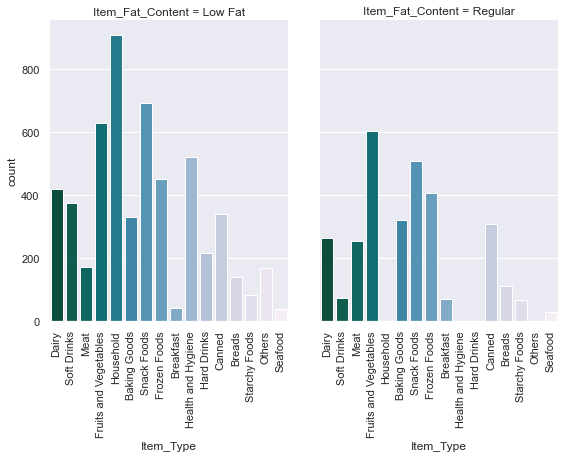

In [32]:
g = sns.catplot(data=bigdmart_cat, x="Item_Type", col="Item_Fat_Content", palette= "PuBuGn_r",kind="count", height=5, aspect=.8)
# set rotation
g.set_xticklabels(rotation=90)


In [33]:
bigdmart_cat["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

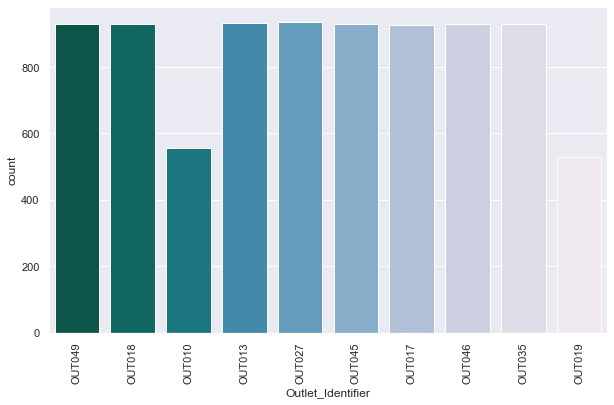

In [34]:
fig_size = (10,6)
fig, ax = plt.subplots(figsize = fig_size)
plt.xticks(rotation=90)
sns.countplot(data=bigdmart_cat, x="Outlet_Identifier", palette = "PuBuGn_r")

In [35]:
print(bigdmart_cat["Outlet_Identifier"].value_counts())

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


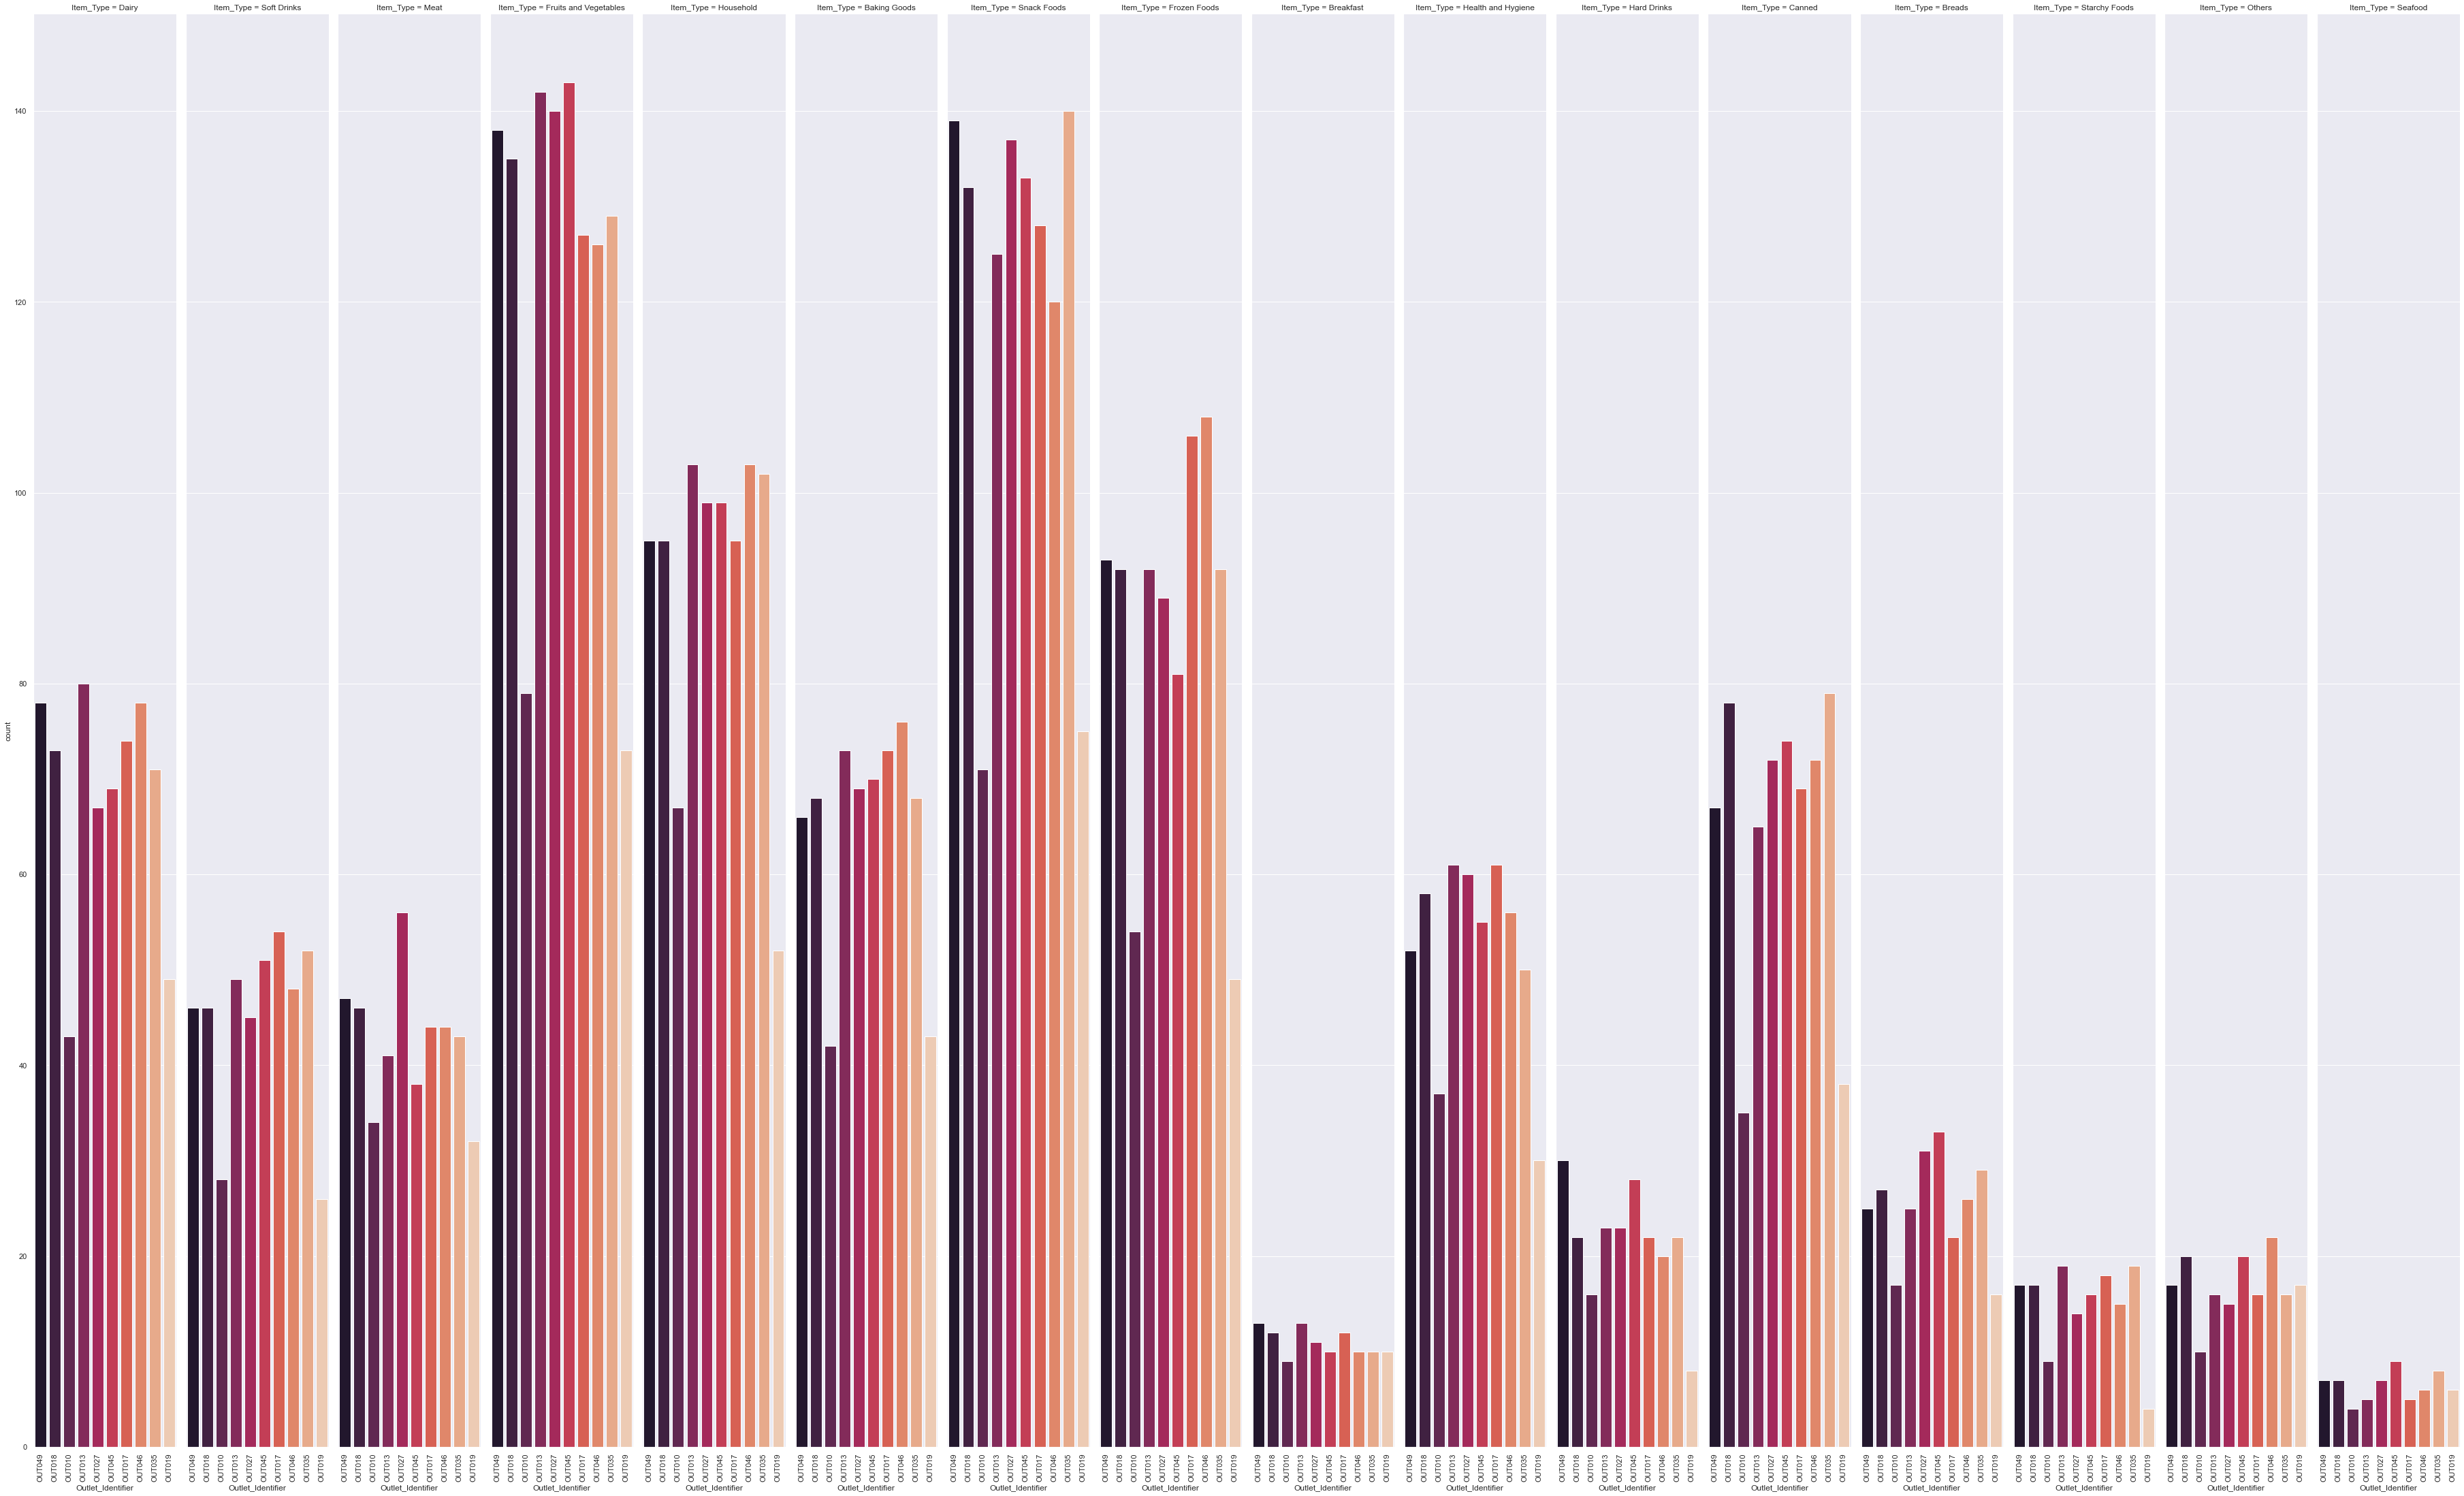

In [36]:
g = sns.catplot(data=bigdmart_cat, x="Outlet_Identifier", col="Item_Type", palette= "rocket",kind="count")
# set rotation
g.set_xticklabels(rotation=90)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(50, 35)

In [37]:
bigdmart_cat["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [38]:
bigdmart_cat["Outlet_Size"].isnull().sum()

2410

In [39]:
bigdmart_cat["Outlet_Size"] = bigdmart_cat["Outlet_Size"].fillna(bigdmart_cat["Outlet_Size"].mode()[0])

In [40]:
bigdmart_cat["Outlet_Size"].isnull().sum()

0

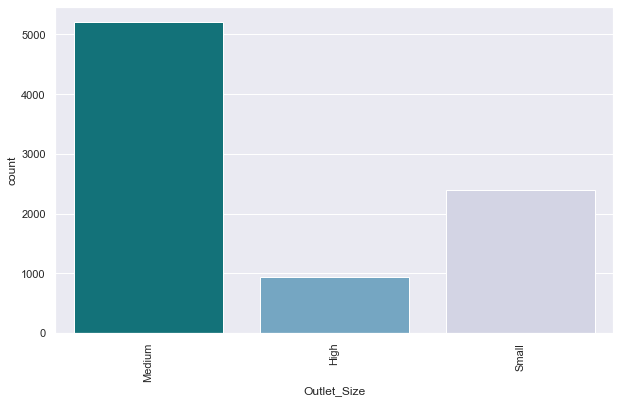

In [41]:
fig_size = (10,6)
fig, ax = plt.subplots(figsize = fig_size)
plt.xticks(rotation=90)
sns.countplot(data=bigdmart_cat, x="Outlet_Size", palette = "PuBuGn_r")

In [42]:
print(bigdmart_cat["Outlet_Size"].value_counts())

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


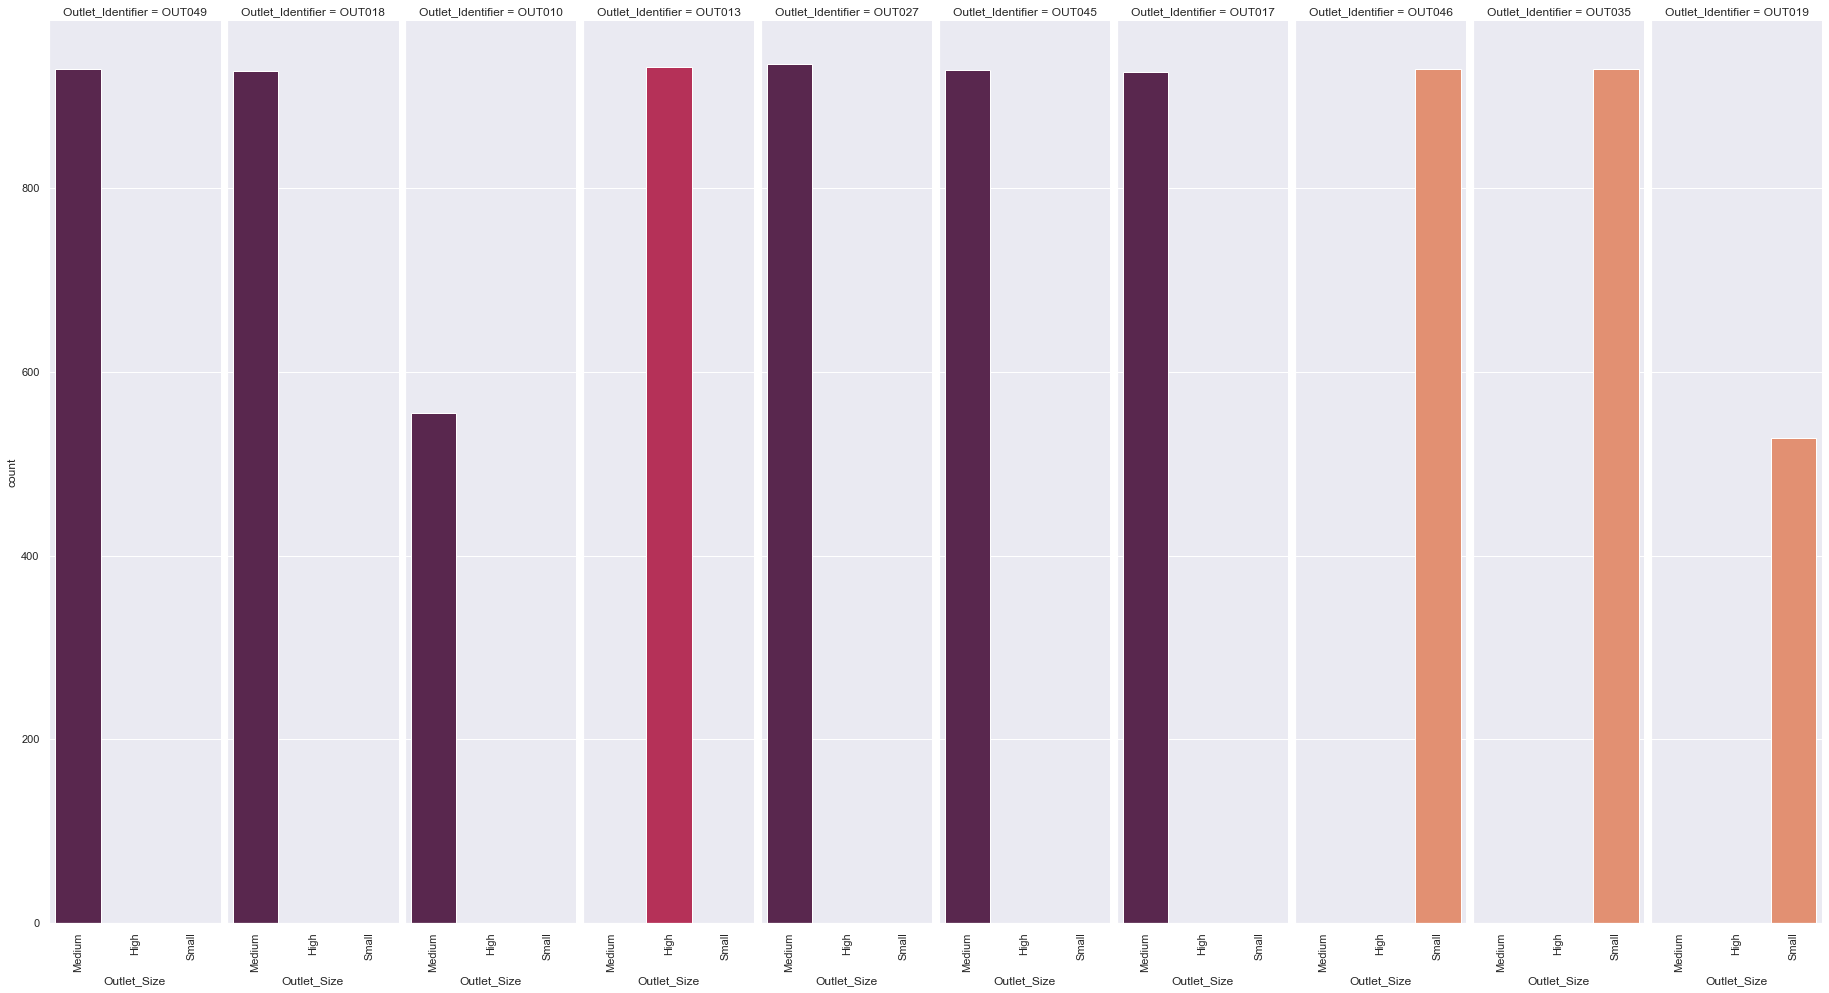

In [43]:
g = sns.catplot(data=bigdmart_cat, x="Outlet_Size", col="Outlet_Identifier", palette= "rocket",kind="count")
# set rotation
g.set_xticklabels(rotation=90)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(25, 15)

In [44]:
bigdmart_cat["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [45]:
print(bigdmart_cat["Outlet_Location_Type"].value_counts())

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


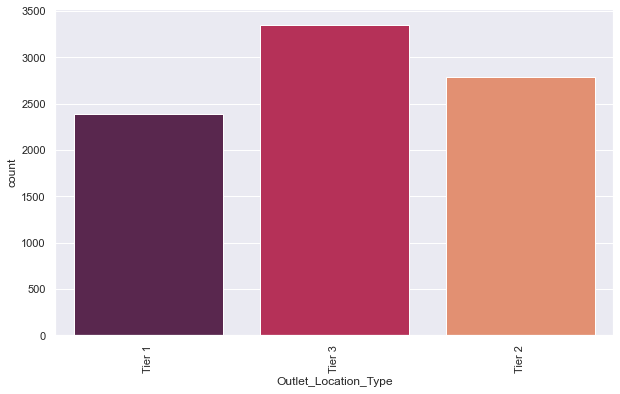

In [46]:
fig_size = (10,6)
fig, ax = plt.subplots(figsize = fig_size)
plt.xticks(rotation=90)
sns.countplot(data=bigdmart_cat, x="Outlet_Location_Type", palette = "rocket")

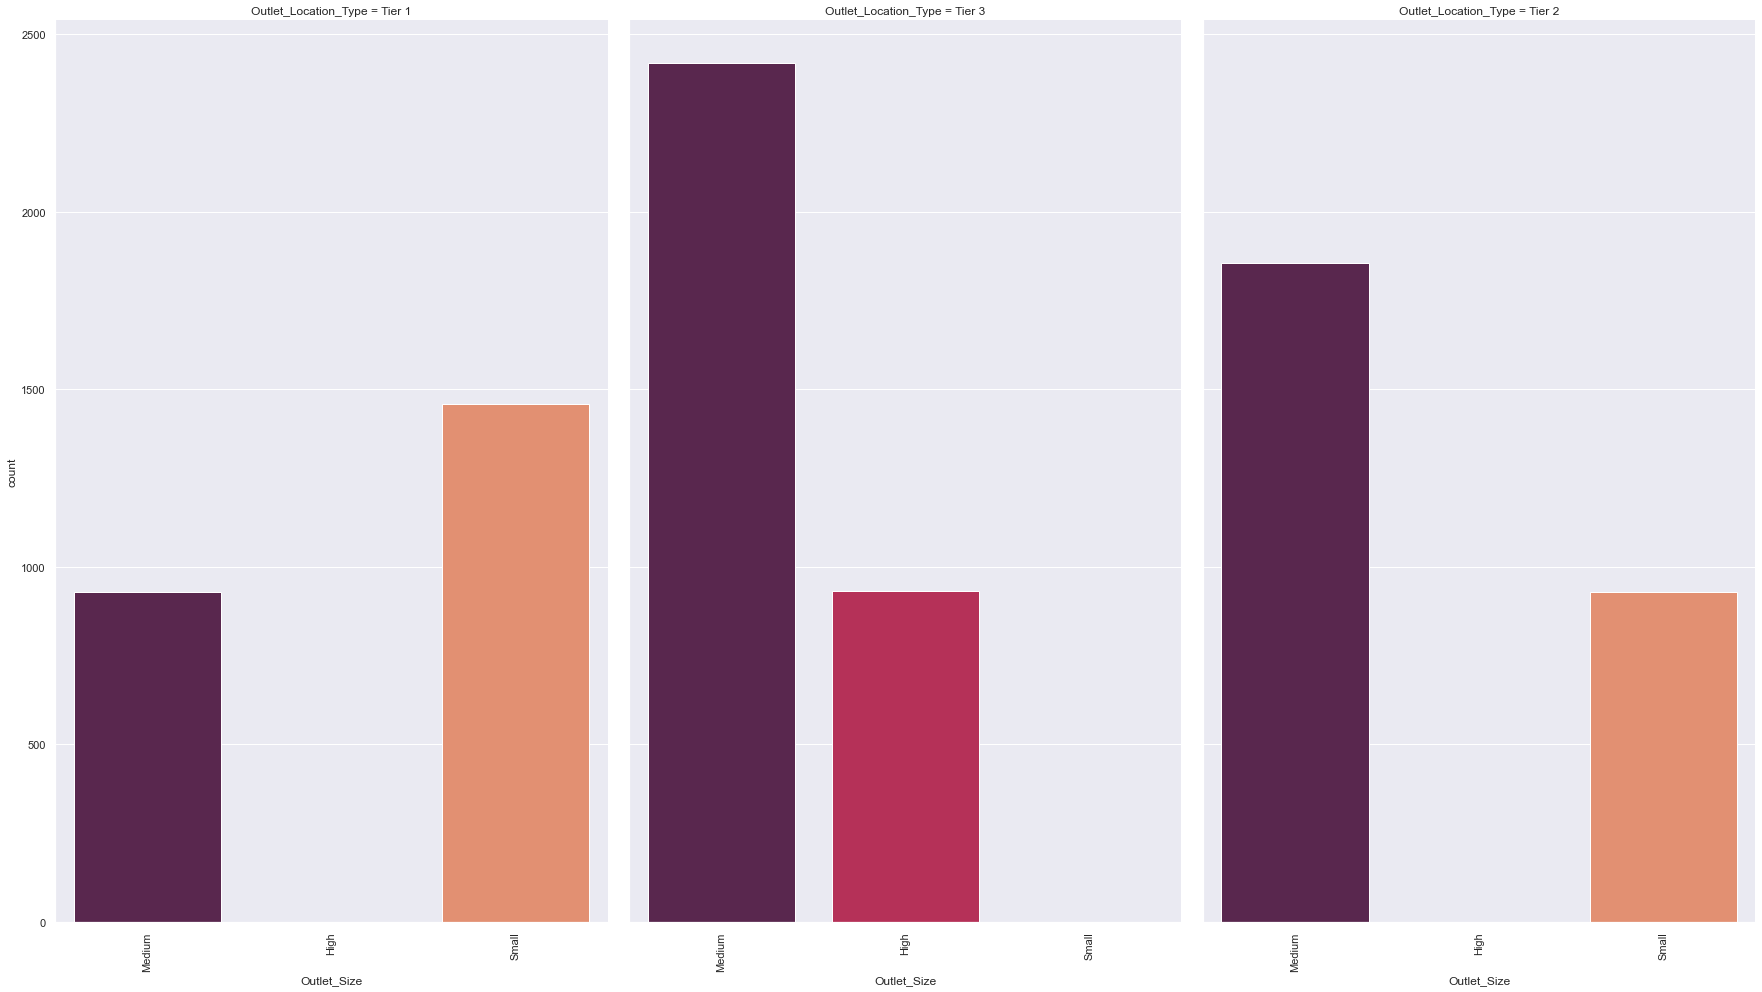

In [47]:
g = sns.catplot(data=bigdmart_cat, x="Outlet_Size", col="Outlet_Location_Type", palette= "rocket",kind="count")
# set rotation
g.set_xticklabels(rotation=90)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(25, 15)

In [48]:
#bigdmart_cat = bigdmart_cat.drop("LF", axis=1)

In [49]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [50]:
bigdmart_cat["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [51]:
print(bigdmart_cat["Outlet_Type"].value_counts())

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


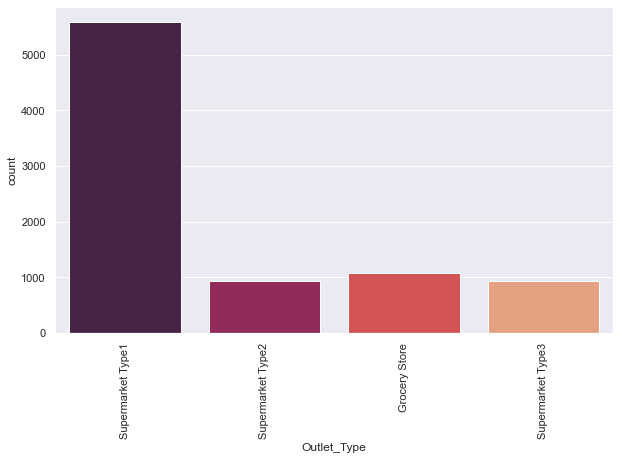

In [52]:
fig_size = (10,6)
fig, ax = plt.subplots(figsize = fig_size)
plt.xticks(rotation=90)
sns.countplot(data=bigdmart_cat, x="Outlet_Type", palette = "rocket")

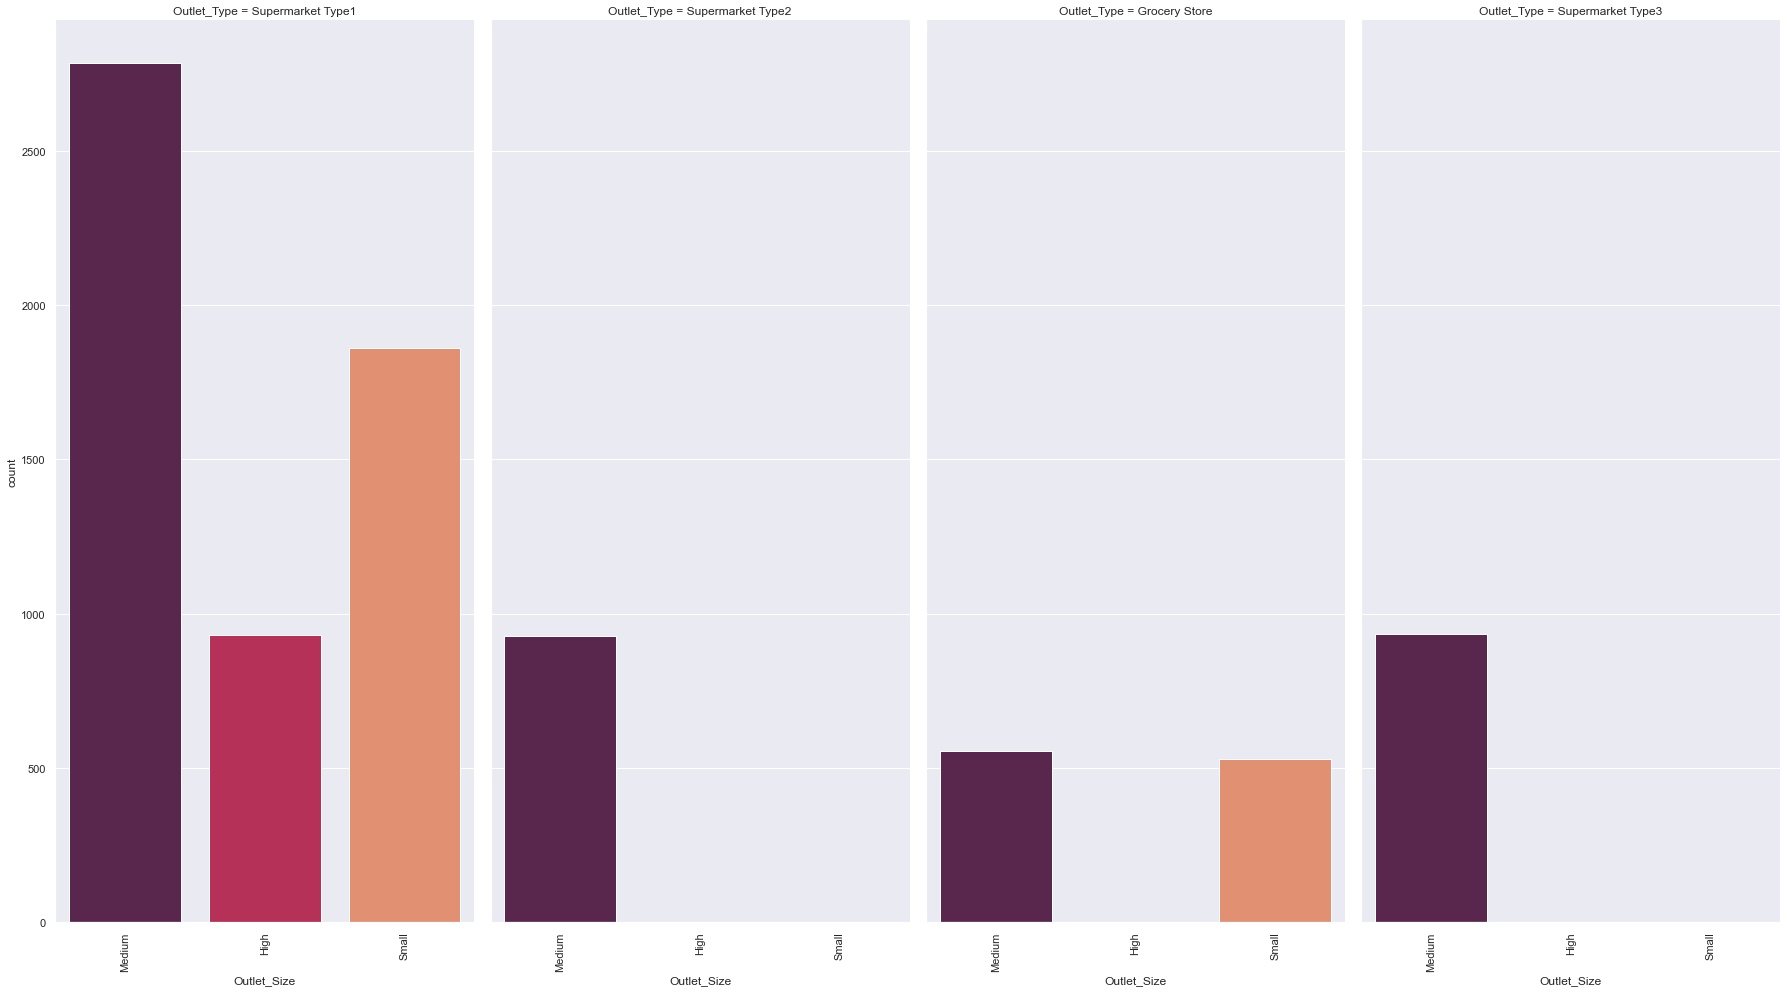

In [53]:
g = sns.catplot(data=bigdmart_cat, x="Outlet_Size", col="Outlet_Type", palette= "rocket",kind="count")
# set rotation
g.set_xticklabels(rotation=90)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(25, 15)

In [54]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [55]:
# import label encoder
from sklearn.preprocessing import LabelEncoder

#intialize label encoder
LE = LabelEncoder()

#change the categorical varaiables to numerical variables
bigdmart_cat["Item_Identifier"] = LE.fit_transform(bigdmart_cat["Item_Identifier"])

In [56]:
bigdmart_cat["Item_Identifier"].head()

0     156
1       8
2     662
3    1121
4    1297
Name: Item_Identifier, dtype: int32

In [57]:
bigdmart_cat["Item_Identifier"].dtypes

dtype('int32')

In [58]:
bigdmart_cat["Item_Fat_Content"] = LE.fit_transform(bigdmart_cat["Item_Fat_Content"])
bigdmart_cat["Item_Type"] = LE.fit_transform(bigdmart_cat["Item_Type"])
bigdmart_cat["Outlet_Identifier"] = LE.fit_transform(bigdmart_cat["Outlet_Identifier"])
bigdmart_cat["Outlet_Size"] = LE.fit_transform(bigdmart_cat["Outlet_Size"])

In [59]:
bigdmart_cat.dtypes

Item_Identifier          int32
Item_Fat_Content         int32
Item_Type                int32
Outlet_Identifier        int32
Outlet_Size              int32
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [60]:
bigdmart_cat.isnull().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [61]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,0,4,9,1,Tier 1,Supermarket Type1
1,8,1,14,3,1,Tier 3,Supermarket Type2
2,662,0,10,9,1,Tier 1,Supermarket Type1
3,1121,1,6,0,1,Tier 3,Grocery Store
4,1297,0,9,1,0,Tier 3,Supermarket Type1


In [62]:
#Introducing one hot encoder to convert categorical feature sex 
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

new = ohe.fit_transform(bigdmart_cat["Outlet_Location_Type"].values.reshape(-1,1)).toarray()
#concatinating Female, Infant and Male column with the dataframe
new_df = pd.DataFrame(new, columns = [np.unique(big["Outlet_Location_Type"])])
bigdmart_cat = pd.concat([bigdmart_cat, new_df], axis = 1)

In [63]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,"(Tier 1,)","(Tier 2,)","(Tier 3,)"
0,156,0,4,9,1,Tier 1,Supermarket Type1,1.0,0.0,0.0
1,8,1,14,3,1,Tier 3,Supermarket Type2,0.0,0.0,1.0
2,662,0,10,9,1,Tier 1,Supermarket Type1,1.0,0.0,0.0
3,1121,1,6,0,1,Tier 3,Grocery Store,0.0,0.0,1.0
4,1297,0,9,1,0,Tier 3,Supermarket Type1,0.0,0.0,1.0


In [64]:
new = ohe.fit_transform(bigdmart_cat["Outlet_Type"].values.reshape(-1,1)).toarray()
#concatinating Female, Infant and Male column with the dataframe
new_df = pd.DataFrame(new, columns = [np.unique(big["Outlet_Type"])])
bigdmart_cat = pd.concat([bigdmart_cat, new_df], axis = 1)

In [65]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,"(Tier 1,)","(Tier 2,)","(Tier 3,)","(Grocery Store,)","(Supermarket Type1,)","(Supermarket Type2,)","(Supermarket Type3,)"
0,156,0,4,9,1,Tier 1,Supermarket Type1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8,1,14,3,1,Tier 3,Supermarket Type2,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,662,0,10,9,1,Tier 1,Supermarket Type1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1121,1,6,0,1,Tier 3,Grocery Store,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1297,0,9,1,0,Tier 3,Supermarket Type1,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [66]:
bigdmart_cat = bigdmart_cat.drop("Outlet_Location_Type", axis=1)
bigdmart_cat = bigdmart_cat.drop("Outlet_Type", axis=1)

In [67]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,"(Tier 1,)","(Tier 2,)","(Tier 3,)","(Grocery Store,)","(Supermarket Type1,)","(Supermarket Type2,)","(Supermarket Type3,)"
0,156,0,4,9,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8,1,14,3,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,662,0,10,9,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1121,1,6,0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1297,0,9,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [68]:
bigdmart_cat.columns = ['Item_Identifier',  'Item_Fat_Content', 'Item_Type','Outlet_Identifier',"Outlet_Size",'Tier 1', 'Tier 2', 'Tier 3', 'Grocery Store','Supermarket Type 1', 'Supermarket Type 2','Supermarket Type 3']

In [69]:
bigdmart_cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Tier 1', 'Tier 2', 'Tier 3', 'Grocery Store',
       'Supermarket Type 1', 'Supermarket Type 2', 'Supermarket Type 3'],
      dtype='object')

In [70]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type 1,Supermarket Type 2,Supermarket Type 3
0,156,0,4,9,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8,1,14,3,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,662,0,10,9,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1121,1,6,0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1297,0,9,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [71]:
int_conv = ['Tier 1', 'Tier 2', 'Tier 3', 'Grocery Store','Supermarket Type 1', 'Supermarket Type 2','Supermarket Type 3']
for value in int_conv:
    bigdmart_cat[value] = bigdmart_cat[value].astype(int)
    

In [72]:
bigdmart_cat.dtypes

Item_Identifier       int32
Item_Fat_Content      int32
Item_Type             int32
Outlet_Identifier     int32
Outlet_Size           int32
Tier 1                int32
Tier 2                int32
Tier 3                int32
Grocery Store         int32
Supermarket Type 1    int32
Supermarket Type 2    int32
Supermarket Type 3    int32
dtype: object

In [73]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type 1,Supermarket Type 2,Supermarket Type 3
0,156,0,4,9,1,1,0,0,0,1,0,0
1,8,1,14,3,1,0,0,1,0,0,1,0
2,662,0,10,9,1,1,0,0,0,1,0,0
3,1121,1,6,0,1,0,0,1,1,0,0,0
4,1297,0,9,1,0,0,0,1,0,1,0,0


In [74]:
bigdmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [75]:
bigdmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [76]:
bigdmart_num = bigdmart[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Outlet_Sales"]].copy()

In [77]:
bigdmart_num.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [78]:
bigdmart_num.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [79]:
bigdmart_num.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [80]:
bigdmart_num["Item_Weight"] = bigdmart_num["Item_Weight"].fillna(bigdmart_num["Item_Weight"].median())

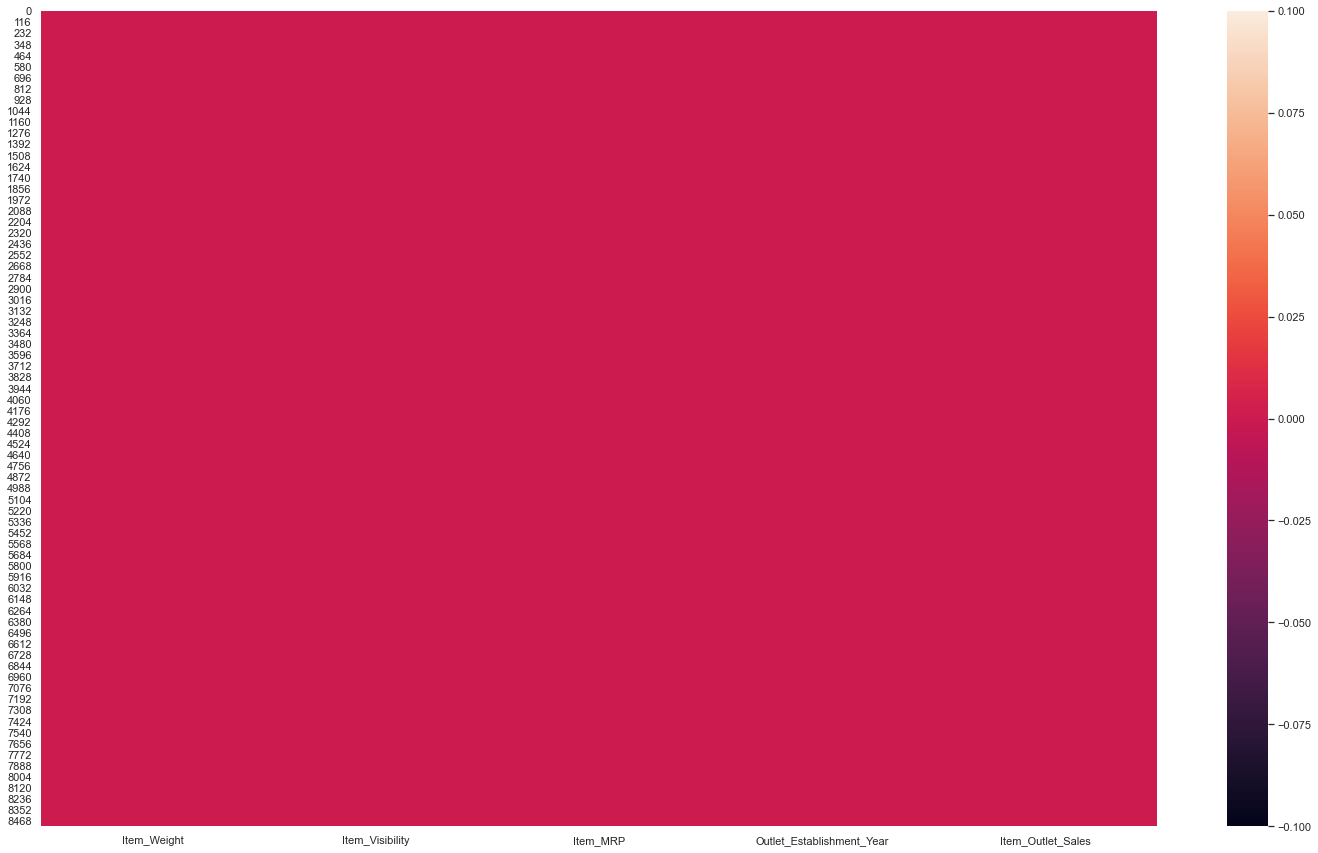

In [81]:
sns.heatmap(bigdmart_num.isnull())

Text(0.5, 1.0, 'Scatter plot comparison item weight and item visibility')

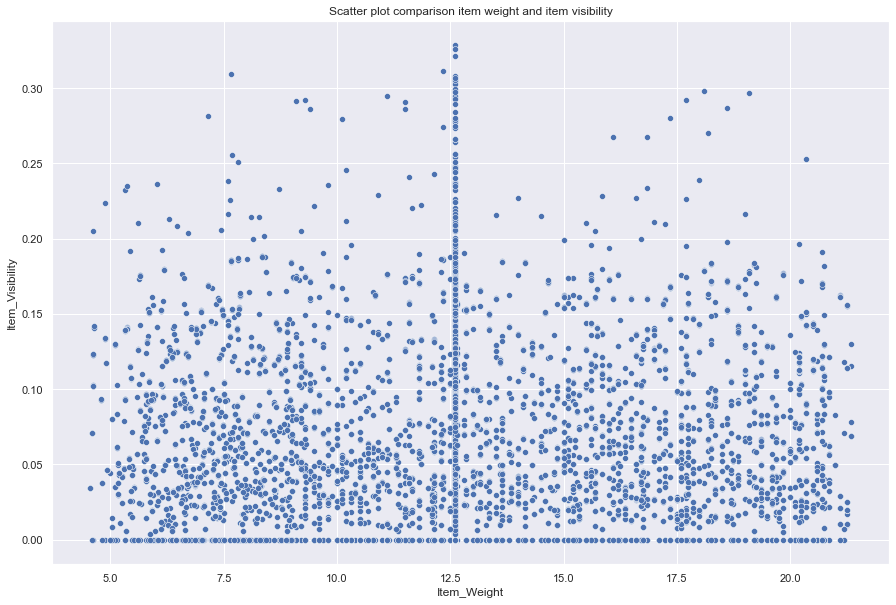

In [82]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.scatterplot(x='Item_Weight', y= 'Item_Visibility', data=bigdmart_num, sizes = 15)
plt.title("Scatter plot comparison item weight and item visibility")

Text(0.5, 1.0, 'Scatter plot comparison item weight and item MRP')

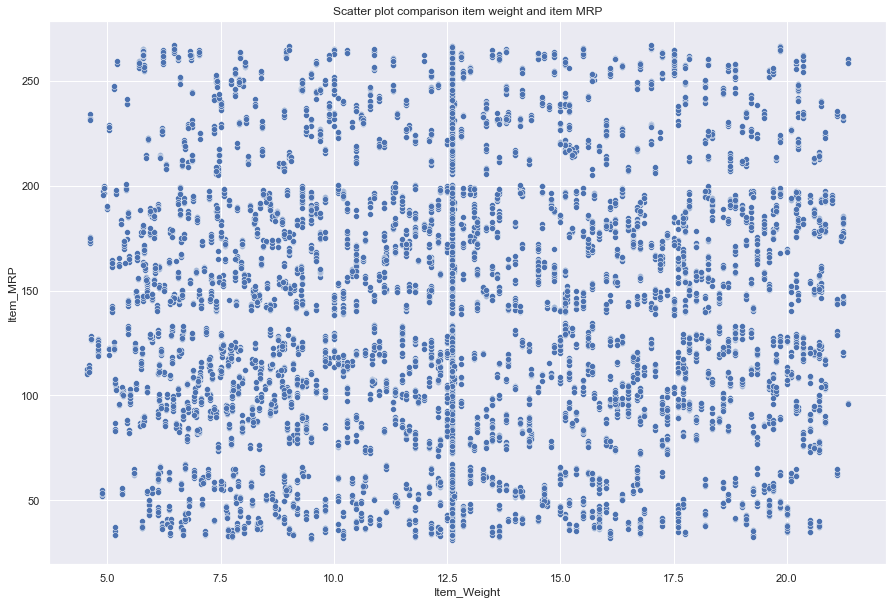

In [83]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.scatterplot(x='Item_Weight', y= 'Item_MRP', data=bigdmart_num, sizes = 15)
plt.title("Scatter plot comparison item weight and item MRP")

In [84]:
bigdmart_num["Outlet_Establishment_Year"] = pd.to_datetime(bigdmart_num["Outlet_Establishment_Year"], format="%Y")
#bigdmart_num["Outlet_Establishment_Year"] = pd.DatetimeIndex(bigdmart_num["Outlet_Establishment_Year"]).year

#bigdmart_num["Outlet_Establishment_Year"] = bigdmart_num["Outlet_Establishment_Year"].dt.year

In [85]:
bigdmart_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999-01-01,3735.1380
1,5.92,0.019278,48.2692,2009-01-01,443.4228
2,17.50,0.016760,141.6180,1999-01-01,2097.2700
3,19.20,0.000000,182.0950,1998-01-01,732.3800
4,8.93,0.000000,53.8614,1987-01-01,994.7052


In [86]:
bigdmart_num.dtypes


Item_Weight                         float64
Item_Visibility                     float64
Item_MRP                            float64
Outlet_Establishment_Year    datetime64[ns]
Item_Outlet_Sales                   float64
dtype: object

Text(0.5, 1.0, 'Scatter plot comparison sales and year')

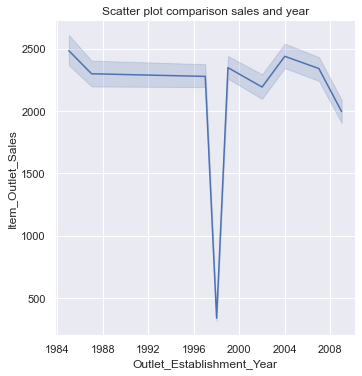

In [87]:
sns.relplot(x='Outlet_Establishment_Year', y= 'Item_Outlet_Sales', data=bigdmart_num,kind="line", sizes = 15)
plt.title("Scatter plot comparison sales and year")

Text(0.5, 1.0, 'Scatter plot comparison sales and year')

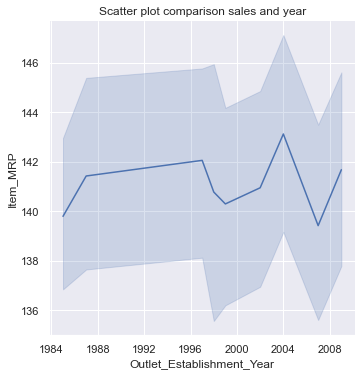

In [88]:
sns.relplot(x='Outlet_Establishment_Year', y= 'Item_MRP', data=bigdmart_num,kind="line", sizes = 15)
plt.title("Scatter plot comparison sales and year")

In [89]:
bigdmart_num["Outlet_Establishment_Year"] = pd.DatetimeIndex(bigdmart_num["Outlet_Establishment_Year"]).year

In [90]:
bigmart = pd.concat([bigdmart_num,bigdmart_cat], axis=1)

In [91]:
bigmart.shape

(8523, 17)

In [92]:
bigmart.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Tier 1', 'Tier 2', 'Tier 3', 'Grocery Store', 'Supermarket Type 1',
       'Supermarket Type 2', 'Supermarket Type 3'],
      dtype='object')

In [93]:
bigmart.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type 1,Supermarket Type 2,Supermarket Type 3
0,9.30,0.016047,249.8092,1999,3735.1380,156,0,4,9,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,8,1,14,3,1,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,662,0,10,9,1,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,1121,1,6,0,1,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1297,0,9,1,0,0,0,1,0,1,0,0


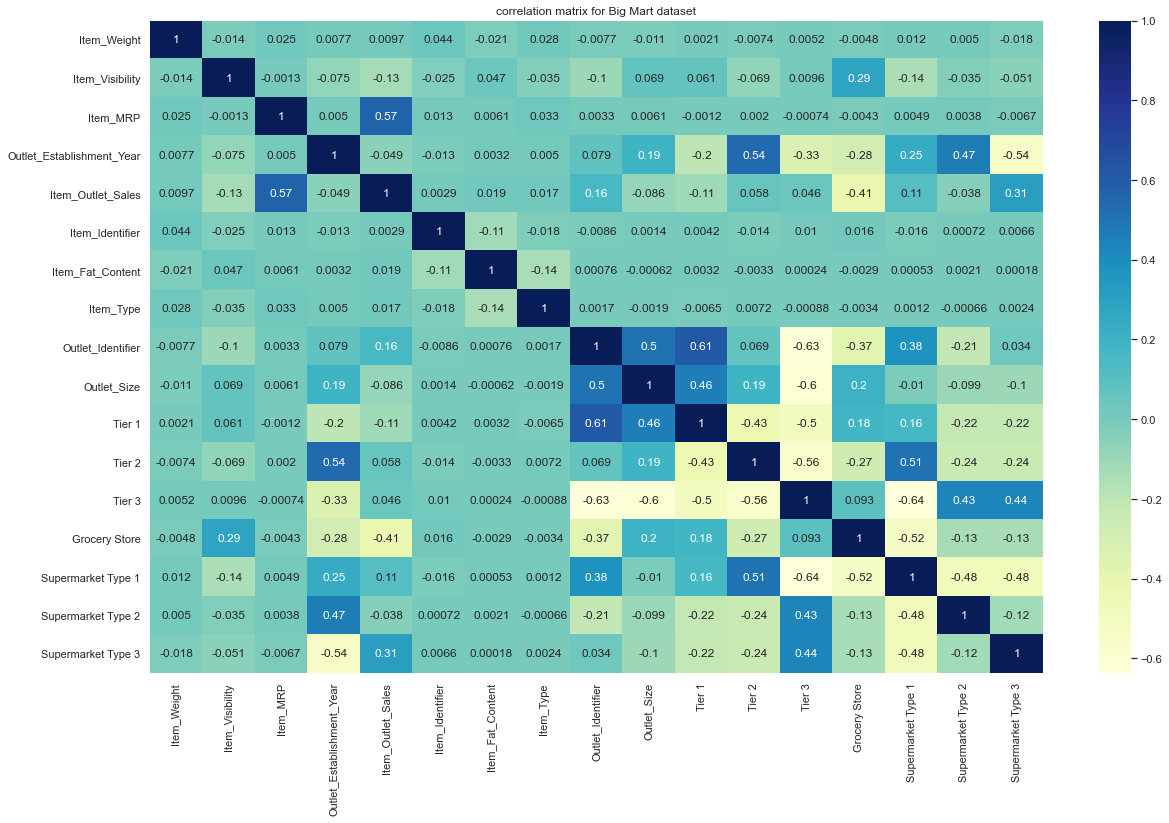

In [94]:
#check the correlation 
corr_mat = bigmart.corr()
plt.figure(figsize=[20,12])
sns.heatmap(corr_mat, annot=True, cmap="YlGnBu")
plt.title("correlation matrix for Big Mart dataset")
plt.show()

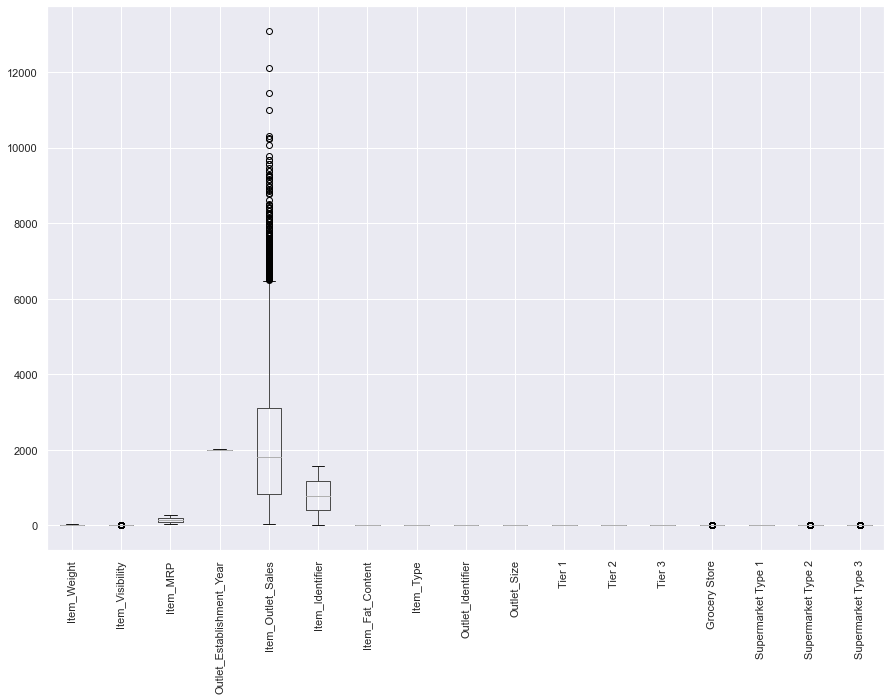

In [95]:
bigmart.boxplot(figsize = [15,10])
plt.xticks(rotation=90)
plt.show()

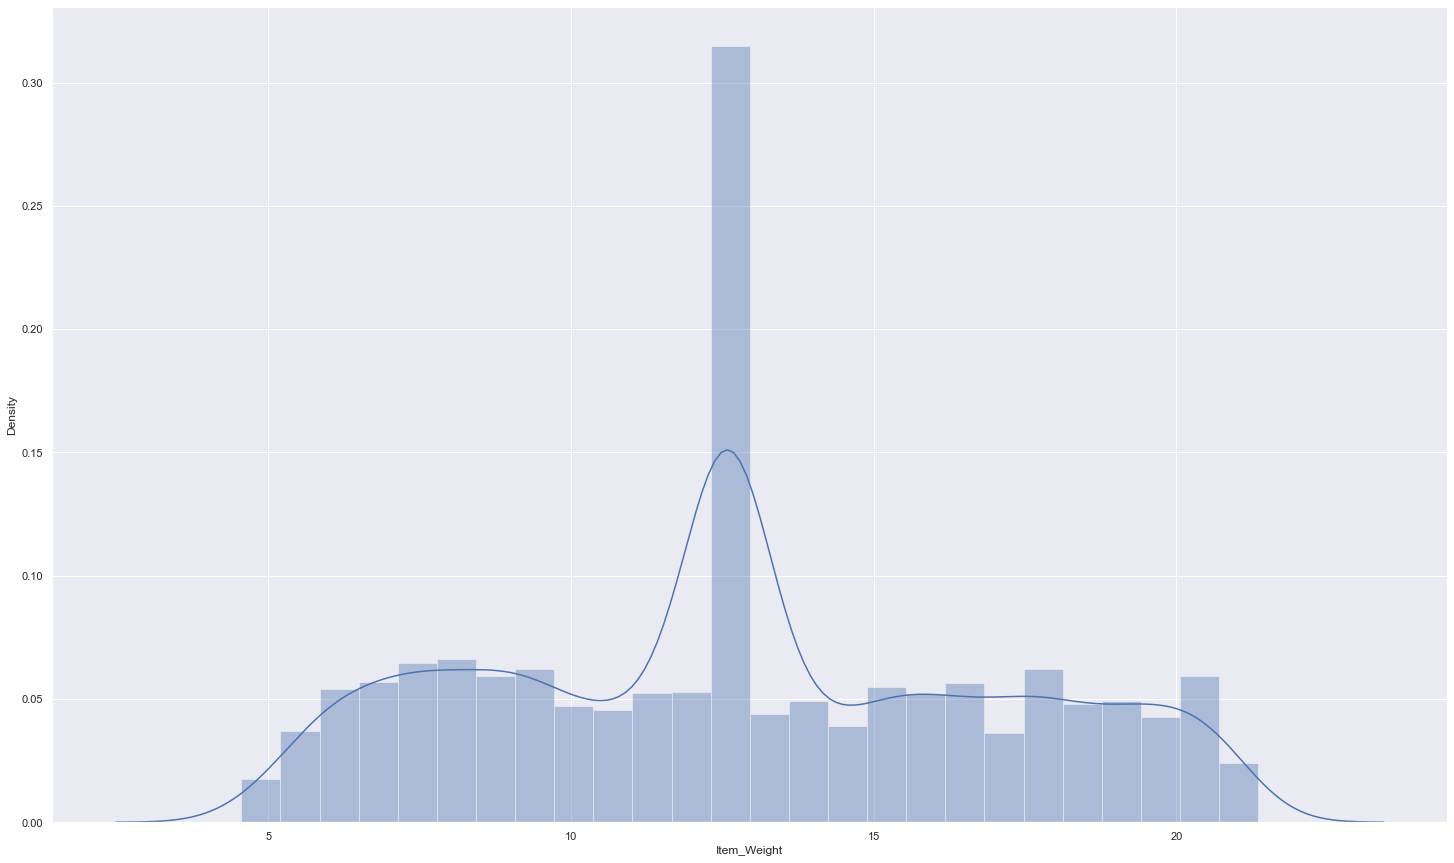

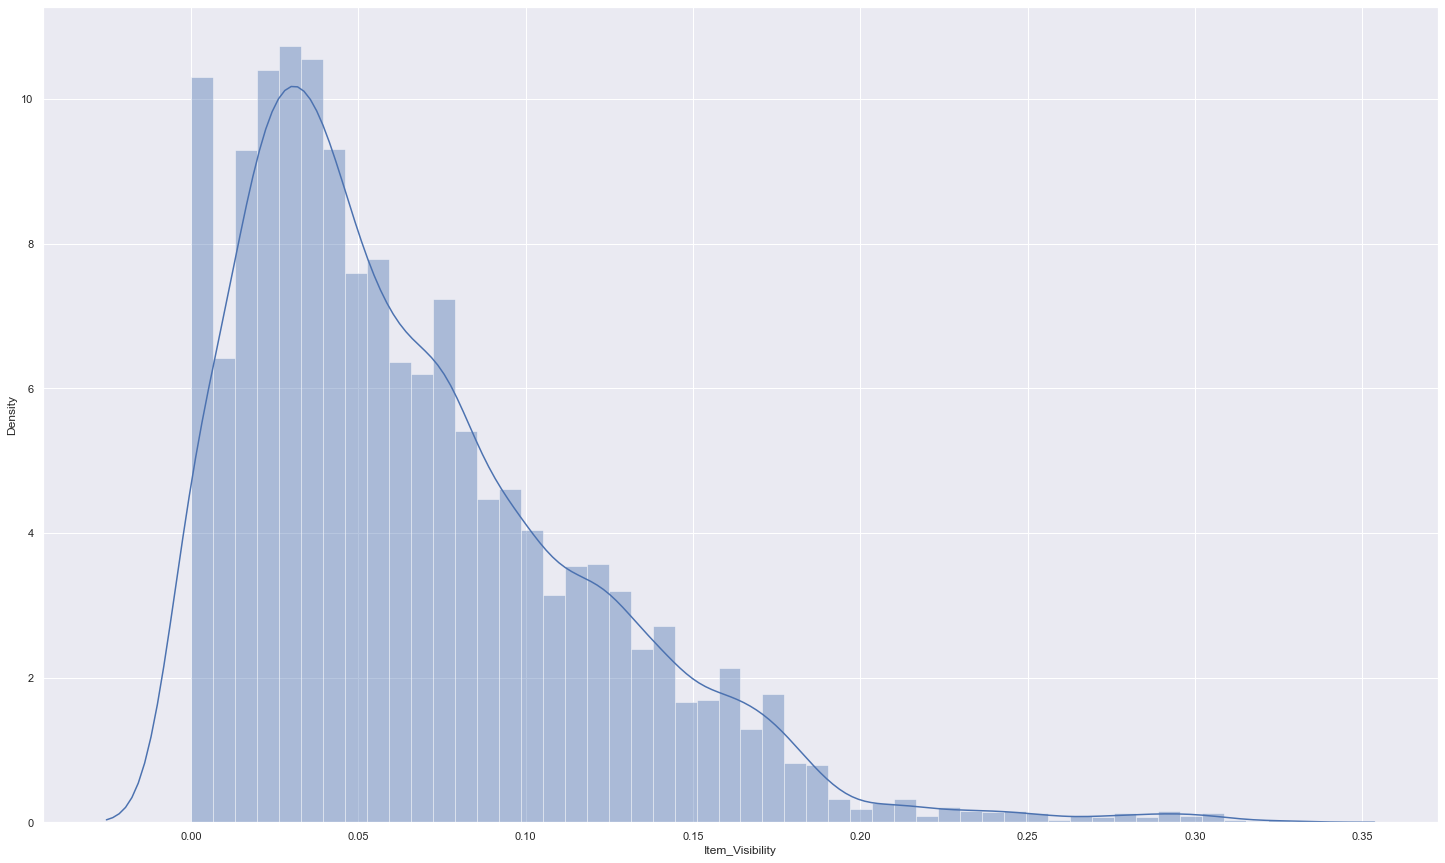

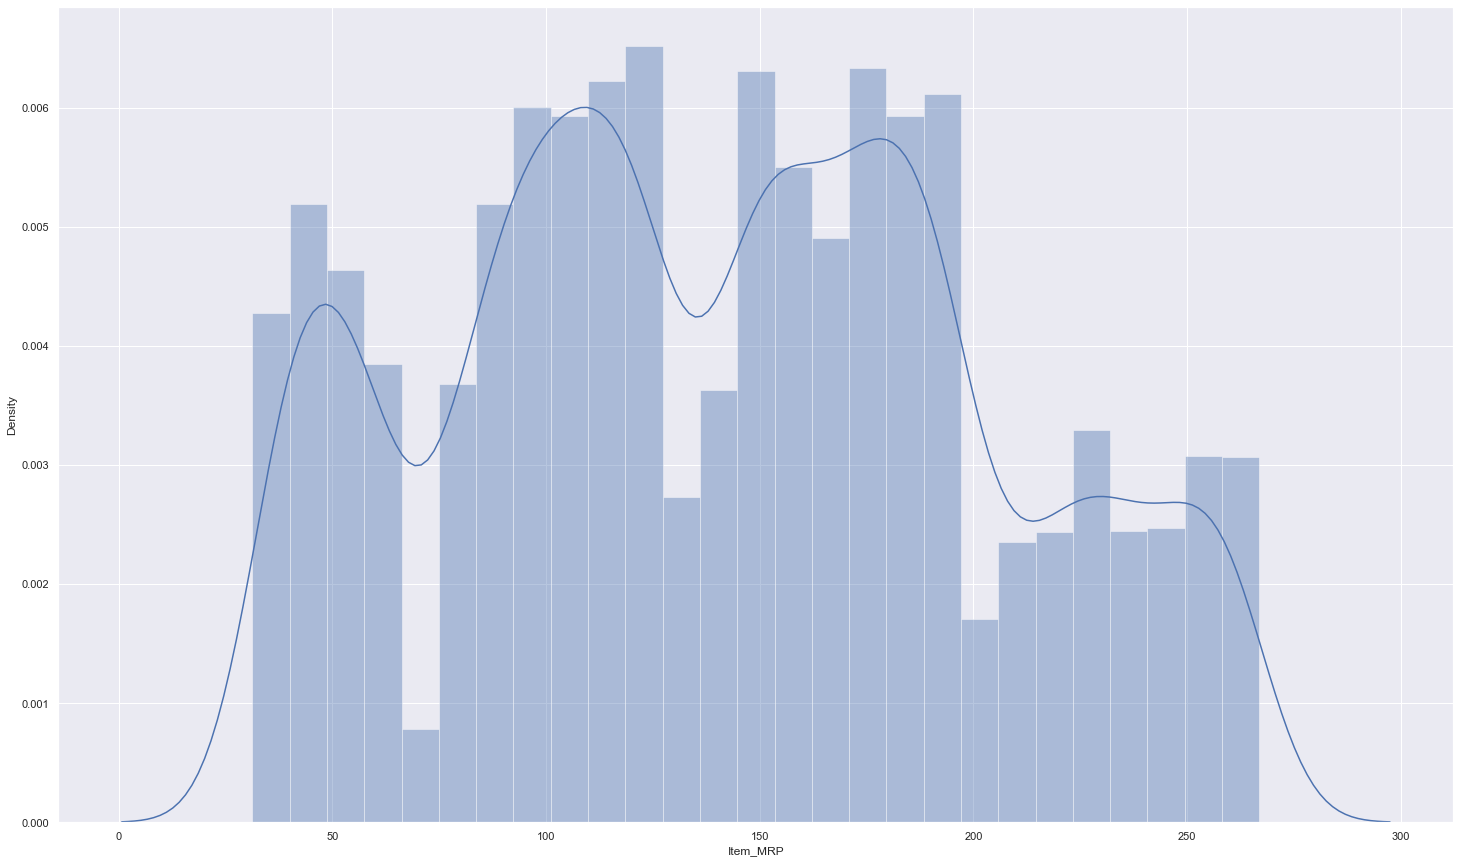

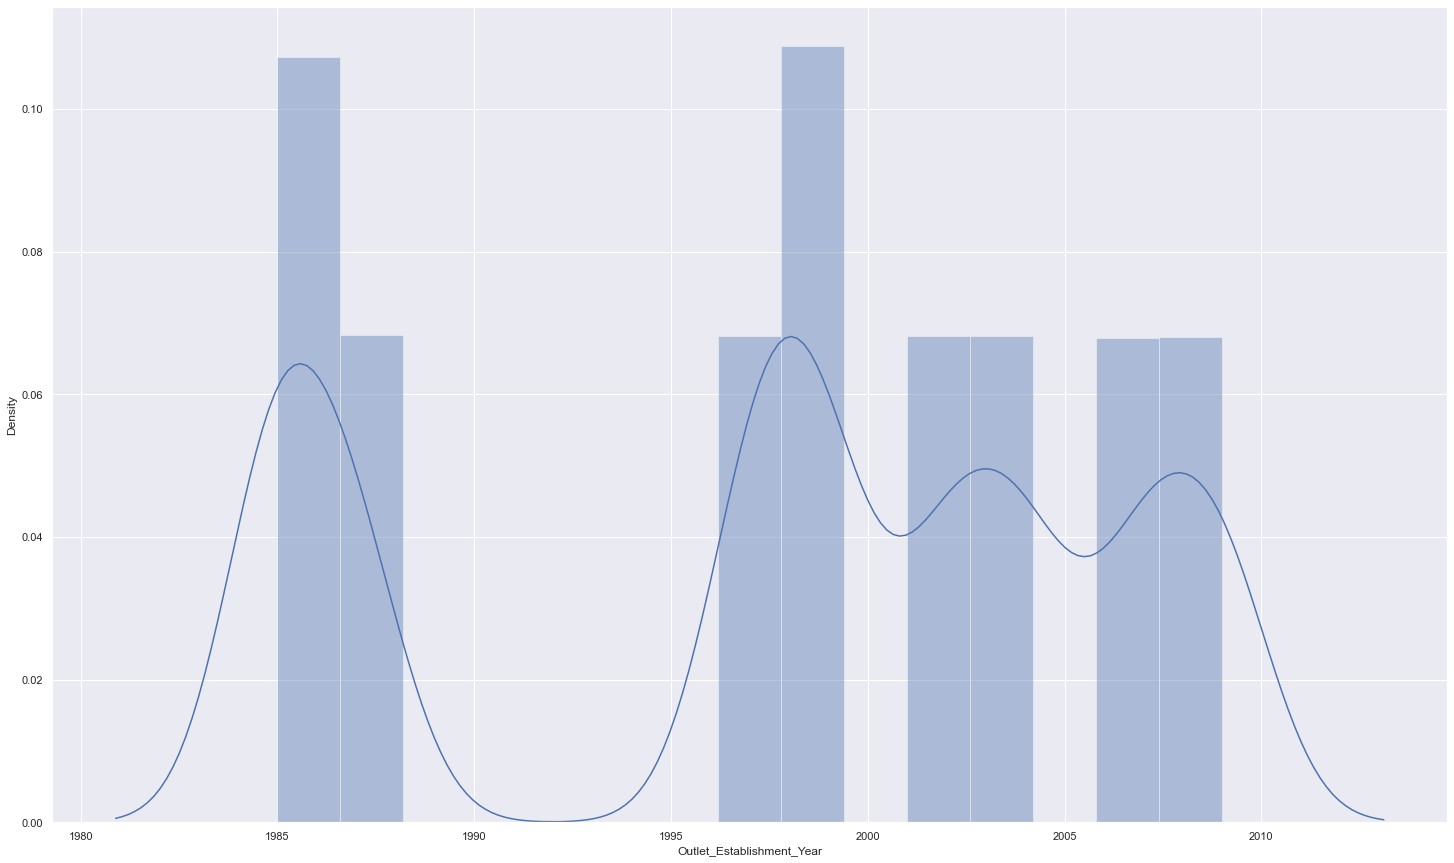

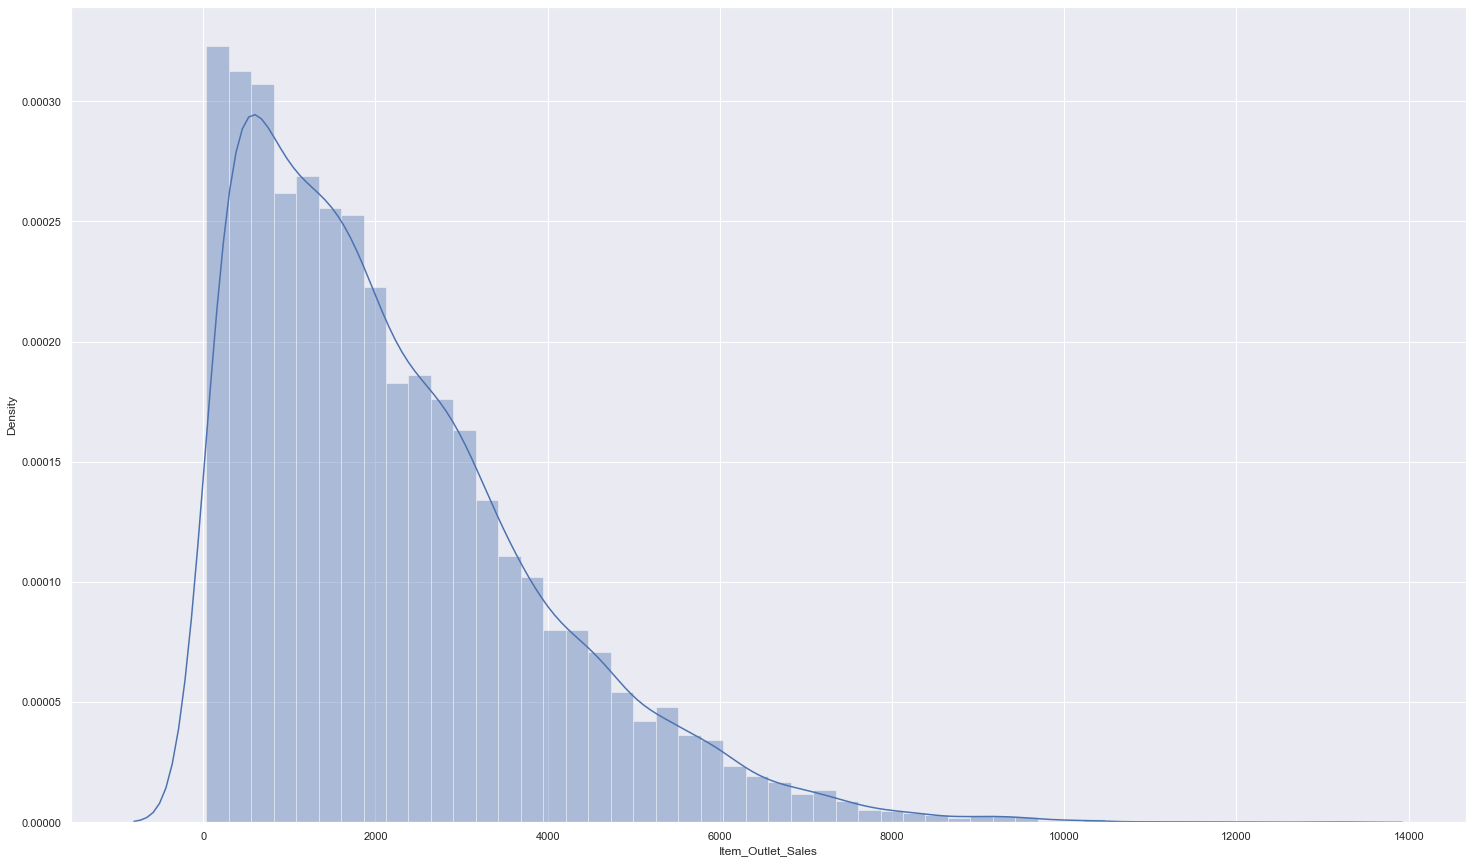

In [96]:
column = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales']
for value in column:
    sns.distplot(bigmart[value],kde=True)
    plt.show()
 

In [97]:
bigmart.skew()

Item_Weight                  0.121845
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Item_Identifier             -0.008877
Item_Fat_Content             0.616705
Item_Type                    0.101655
Outlet_Identifier           -0.059861
Outlet_Size                 -0.087072
Tier 1                       0.979119
Tier 2                       0.738834
Tier 3                       0.437995
Grocery Store                2.239897
Supermarket Type 1          -0.649203
Supermarket Type 2           2.511707
Supermarket Type 3           2.498184
dtype: float64

In [98]:
Item_Visibility = bigmart[["Item_Visibility"]].copy()

In [99]:
Item_Visibility

,Item_Visibility
0,0.016047
1,0.019278
2,0.016760
3,0.000000
4,0.000000
...,...
8518,0.056783
8519,0.046982
8520,0.035186
8521,0.145221


In [100]:
# implementing power transform to remove skewness
from sklearn.preprocessing import power_transform

In [101]:
iv = power_transform(Item_Visibility)
iv = pd.DataFrame(iv, columns= Item_Visibility.columns)

In [102]:
iv.skew()


Item_Visibility    0.124279
dtype: float64

In [103]:

bigmart = bigmart.drop("Item_Visibility", axis=1)

In [104]:
bigmart["Item_Visibility"] = iv

In [105]:
bigmart

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type 1,Supermarket Type 2,Supermarket Type 3,Item_Visibility
0,9.300,249.8092,1999,3735.1380,156,0,4,9,1,1,0,0,0,1,0,0,-1.146886
1,5.920,48.2692,2009,443.4228,8,1,14,3,1,0,0,1,0,0,1,0,-1.037100
2,17.500,141.6180,1999,2097.2700,662,0,10,9,1,1,0,0,0,1,0,0,-1.122375
3,19.200,182.0950,1998,732.3800,1121,1,6,0,1,0,0,1,1,0,0,0,-1.745551
4,8.930,53.8614,1987,994.7052,1297,0,9,1,0,0,0,1,0,1,0,0,-1.745551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,214.5218,1987,2778.3834,370,0,13,1,0,0,0,1,0,1,0,0,0.020310
8519,8.380,108.1570,2002,549.2850,897,1,0,7,1,0,1,0,0,1,0,0,-0.221388
8520,10.600,85.1224,2004,1193.1136,1357,0,8,6,2,0,1,0,0,1,0,0,-0.542979
8521,7.210,103.1332,2009,1845.5976,681,1,13,3,1,0,0,1,0,0,1,0,1.459990


In [106]:
bigmart.dtypes

Item_Weight                  float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Item_Identifier                int32
Item_Fat_Content               int32
Item_Type                      int32
Outlet_Identifier              int32
Outlet_Size                    int32
Tier 1                         int32
Tier 2                         int32
Tier 3                         int32
Grocery Store                  int32
Supermarket Type 1             int32
Supermarket Type 2             int32
Supermarket Type 3             int32
Item_Visibility              float64
dtype: object

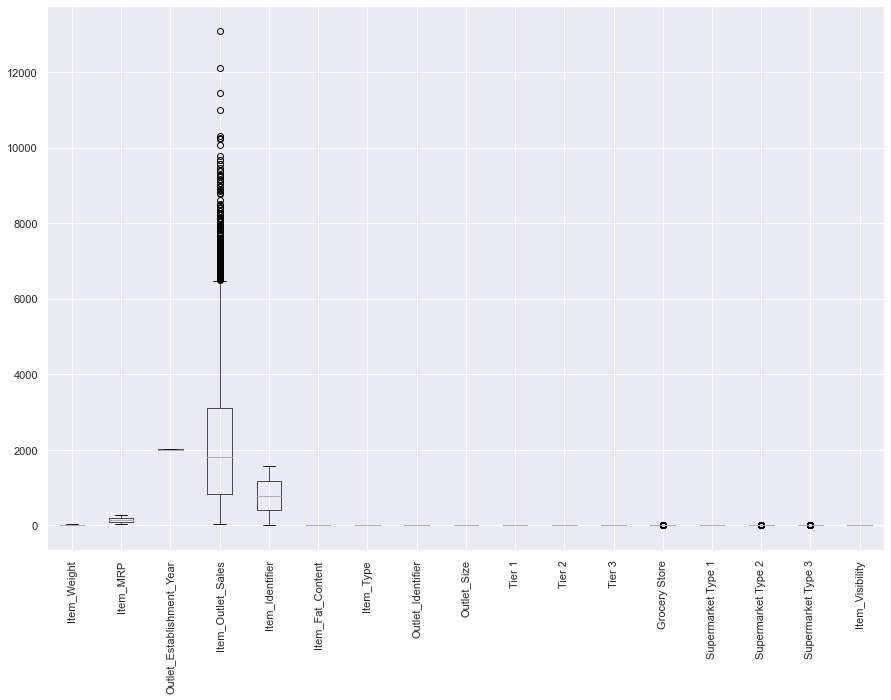

In [107]:
bigmart.boxplot(figsize = [15,10])
plt.xticks(rotation=90)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2eb5d7665b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2eb5ddb2910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2eb5d766880>],
 'medians': [<matplotlib.lines.Line2D at 0x2eb5ddb2760>],
 'fliers': [<matplotlib.lines.Line2D at 0x2eb5d785220>],
 'means': []}

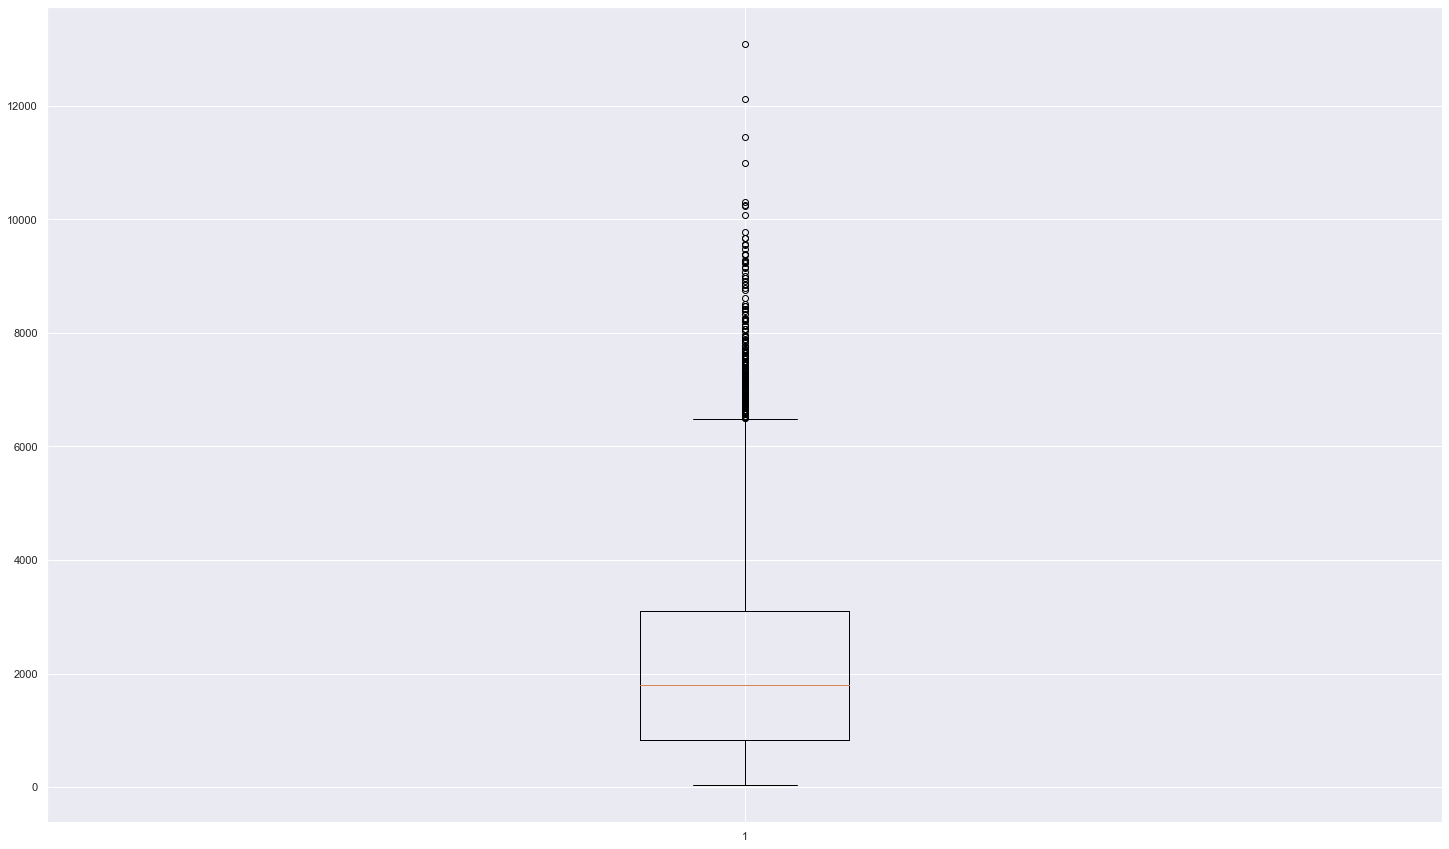

In [108]:
plt.boxplot(bigmart["Item_Outlet_Sales"])

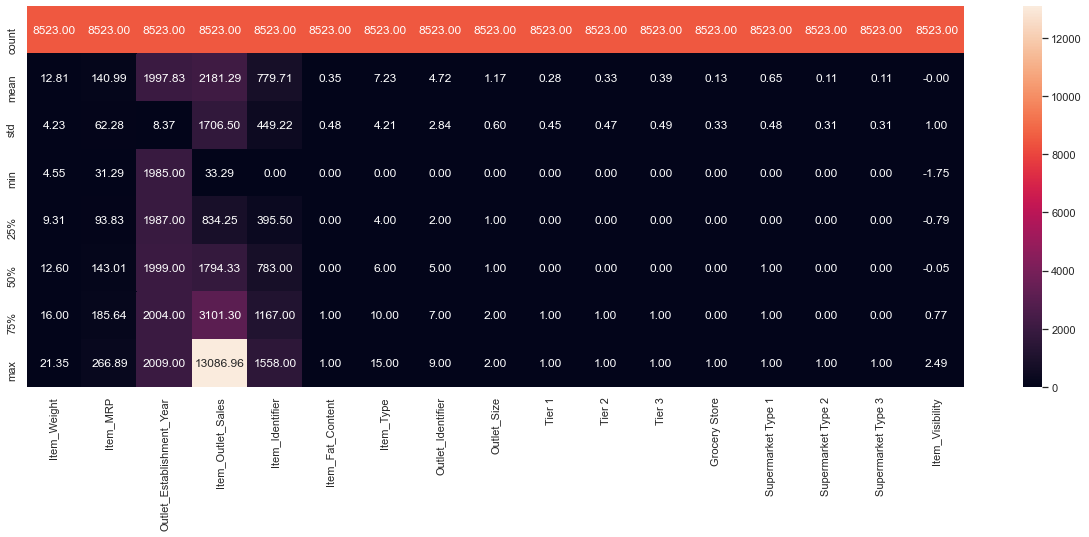

In [109]:
# using heatmap to verify summary statistics
plt.figure(figsize =(21, 7))
sns.heatmap(bigmart.describe(), annot=True, linecolor = "black", fmt="0.2f")

In [110]:
bigmart = pd.DataFrame(bigmart, columns= bigmart.columns)

In [111]:
x = bigmart.drop("Item_Outlet_Sales", axis = 1)
y = bigmart["Item_Outlet_Sales"]

In [112]:
print(x.shape,y.shape)

(8523, 16) (8523,)


In [113]:
#scaling standardize the model thus the prediction come out with accuracy
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x = scale.fit_transform(x)

#scaled 


In [114]:
x.shape

(8523, 16)

In [115]:
y.shape

(8523,)

In [116]:
## finding the best random state
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc = r2_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.6019763008727196  on Random State  247


In [117]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = 247)

In [118]:
# printing the shape of train test split data
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(1705, 16)
(1705,)
(6818, 16)
(6818,)


In [119]:
# Linear regression to test the best score
from sklearn.metrics import mean_squared_error, mean_absolute_error
lr = LinearRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print(r2_score(y_test, predlr))
print("Mean absolute error: ", mean_absolute_error(y_test,predlr))
print("Mean squared error: ", mean_squared_error(y_test,predlr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predlr)))



0.6019763008727196
Mean absolute error:  802.1916098321635
Mean squared error:  1168945.8883287513
Root Mean Squared Error:  1081.1780095473416


In [120]:
#RandomforestRegressor
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100)
RFR.fit(x_train,y_train)
predrfr = RFR.predict(x_test)
print(r2_score(y_test,predrfr))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predrfr))
print("Mean squared error: ", mean_squared_error(y_test,predrfr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predrfr)))

0.5808583040349615
error
Mean absolute error:  774.3457332586511
Mean squared error:  1230966.8072523323
Root Mean Squared Error:  1109.489435394647


In [121]:
#Adaboost regresor
from sklearn.ensemble import AdaBoostRegressor
abr = RandomForestRegressor(n_estimators=100)
abr.fit(x_train,y_train)
predabr = abr.predict(x_test)
print(r2_score(y_test,predrfr))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predabr))
print("Mean squared error: ", mean_squared_error(y_test,predabr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predabr)))

0.5808583040349615
error
Mean absolute error:  770.6374849876833
Mean squared error:  1209009.6330364812
Root Mean Squared Error:  1099.5497410469802


In [122]:
#K Neighbors Regressor 
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors = 14)
knnr.fit(x_train, y_train)
predknnr = knnr.predict(x_test)
#check the accuracy score
print(r2_score(y_test,predknnr))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predknnr))
print("Mean squared error: ", mean_squared_error(y_test,predknnr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predknnr)))

0.5853142226951669
error
Mean absolute error:  794.5524430498533
Mean squared error:  1217880.330723434
Root Mean Squared Error:  1103.5761553800598


In [123]:
from sklearn.model_selection import cross_val_score

lr_scr = cross_val_score(LR, x, y, cv = 5)
print("the cross validation score of Linear regression model :", lr_scr.mean())

the cross validation score of Linear regression model : 0.560369287450902


In [124]:
from sklearn.model_selection import cross_val_score

rf_scr = cross_val_score(RFR, x, y, cv = 5)
print("the cross validation score of Random Forest regression model :", rf_scr.mean())

the cross validation score of Random Forest regression model : 0.5521804372714986


In [125]:
from sklearn.model_selection import cross_val_score

ab_scr = cross_val_score(abr, x, y, cv = 5)
print("the cross validation score of AdaBoost regressoin model :", ab_scr.mean())

the cross validation score of AdaBoost regressoin model : 0.5511622701154759


In [126]:
from sklearn.model_selection import cross_val_score

kn_scr = cross_val_score(knnr, x, y, cv = 5)
print("the cross validation score of Knearestneighbour regression model :", kn_scr.mean())

the cross validation score of Knearestneighbour regression model : 0.5446180780291252


In [127]:
diff = round((r2_score(y_test, predlr))*100) - round((lr_scr.mean())*100)
print("The difference is : " , diff )

The difference is :  4.0


In [128]:
diff = round((r2_score(y_test, predrfr))*100) - round((rf_scr.mean())*100)
print("The difference is : " , diff )

The difference is :  3.0


In [129]:
diff = round((r2_score(y_test, predabr))*100) - round((ab_scr.mean())*100)
print("The difference is : " , diff )

The difference is :  4.0


In [130]:
diff = round((r2_score(y_test, predknnr))*100) - round((kn_scr.mean())*100)
print("The difference is : " , diff )

The difference is :  5.0


In [131]:
from sklearn.linear_model import Ridge

In [132]:
rr = Ridge(alpha = 0.01)
rr.fit(x_train, y_train)
#low alpha > more generalization

Ridge(alpha=0.01)

In [133]:
rr_2 = Ridge(alpha = 100)
rr_2.fit(x_train,y_train)

Ridge(alpha=100)

In [134]:
Ridge_train_score = rr.score(x_train,y_train)
print(Ridge_train_score)
Ridge_test_score = rr.score(x_test,y_test)
print(Ridge_test_score) 

0.5523773247839574
0.6019720759304665


In [135]:
Ridge_train_score2 = rr_2.score(x_train,y_train)
print(Ridge_train_score2)
Ridge_test_score2 = rr_2.score(x_test,y_test)
print(Ridge_test_score2)


0.5522134731166586
0.600762504944667


In [136]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train,y_train)
train_score=lasso.score(x_train,y_train)
test_score=lasso.score(x_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [137]:
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.552355733922176
test score:  0.6018866046211189
number of features used:  12


In [138]:
# using lassoCrossValidation
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

In [139]:
cv = RepeatedKFold(n_splits= 10, n_repeats=3, random_state = 247)
lasso_cv = LassoCV(alphas= arange(0,1,0.01), cv=cv,n_jobs=-1)
lasso_cv.fit(x_train,y_train)

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=247),
        n_jobs=-1)

In [140]:
lasso_cv.alpha_

0.99

In [141]:
lassopred = lasso_cv.predict(x_test)

In [142]:
lasso_cv.score(x_train, y_train)

0.5523561978930899

In [143]:
lasso_cv.score(x_test, y_test)

0.6018875763229308

In [144]:
import joblib
joblib.dump(lasso_cv,"lasso_cvmodel.obj")

['lasso_cvmodel.obj']

In [145]:
joblib.dump(lasso_cv,"lasso_cvmodel.pkl")

['lasso_cvmodel.pkl']

In [146]:
import numpy as np
a = np.array(y_test)
predicted = np.array(lassopred)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,288.9572,345.189589
1,1637.8680,1805.546076
2,4506.1344,3721.378688
3,2365.5874,1760.813269
4,2954.8204,3366.179123
...,...,...
1700,2343.6160,3488.448524
1701,8114.7704,4378.000831
1702,1222.4088,1305.660833
1703,3728.4800,4426.903071
